In [1]:
# numpy and pandas for data manipulation
import sys
import os
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import networkx as nx

import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import cPickle as pickle

warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

ROOT = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/'
ROOT_PACKAGE_DIRECTORY = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/collaborative-optimizer'
root_data = ROOT + '/data'

sys.path.append(ROOT_PACKAGE_DIRECTORY)
from experiment_graph.execution_environment import ExecutionEnvironment
from experiment_graph.executor import CollaborativeExecutor
from experiment_graph.workload import Workload


DATABASE_PATH = root_data + '/experiment_graphs/home-credit-default-risk/materialized-no-groupby'
N_ESTIMATOR = 100
from experiment_graph.optimizations.Reuse import LinearTimeReuse
reuse_type=LinearTimeReuse.NAME

In [2]:
# Prepare the Data
# Create Execution Environment with AllMaterializer
ee = ExecutionEnvironment(reuse_type=reuse_type) 
executor = CollaborativeExecutor(ee)

In [3]:
class BaseWorkload(Workload):
    def run(self, execution_environment, root_data, verbose):
        # Load Data
        train = ee.load(root_data + '/openml/task_id=31/datasets/train.csv')
        test = ee.load(root_data + '/openml/task_id=31/datasets/test.csv')

        test_labels = test['class']
        test = test.drop('class')

        train_labels = train['class']
        train = train.drop(columns=['class'])

        from experiment_graph.sklearn_helper.preprocessing import MinMaxScaler
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(train)
        train = scaler.transform(train)
        #train.data()
        test = scaler.transform(test)

        # Random Forest 1 (n_estimator = 10)
        from experiment_graph.sklearn_helper.ensemble import RandomForestClassifier
        random_forest10 = RandomForestClassifier(n_estimators=10, random_state=50, verbose=1, n_jobs=-1)
        random_forest10.fit(train, train_labels)

        # Execute
        #random_forest10.trained_node.data()

        print 'score: {}'.format(random_forest10.score(test, test_labels).data(verbose=verbose))
        return True
base_workload = BaseWorkload()
executor.end_to_end_run(workload=base_workload, root_data=root_data, verbose=1)

creating a new root node
creating a new root node


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


executing 18 steps to compute vertex AD4CB332A23AF19C1150A43876F369FD
score: {'accuracy': 0.79000000000000004}


True

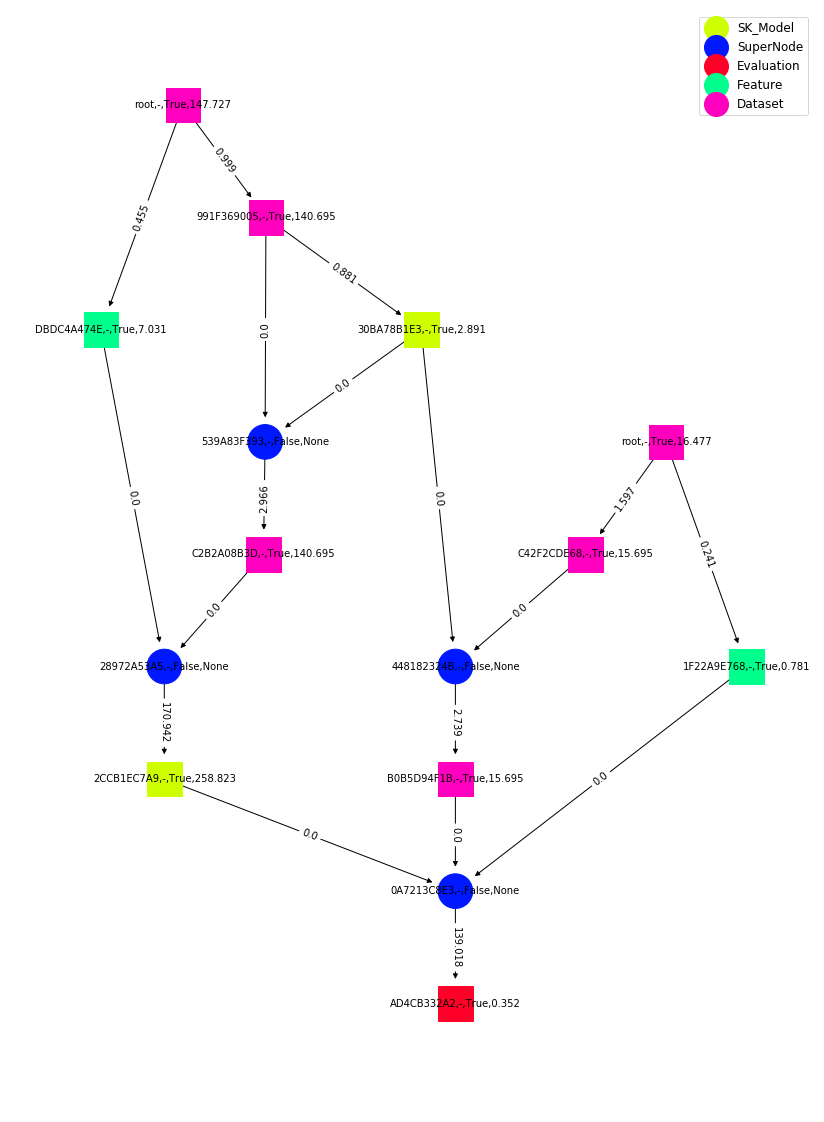

In [4]:
executor.execution_environment.experiment_graph.plot_graph(
    plt,
    figsize=(14, 20),
    labels_for_vertex=['id','mat','size'],
    labels_for_edges=['execution_time'],
    vertex_size=1200)

In [5]:
class ReuseMinMaxWorkload(Workload):
     def run(self, execution_environment, root_data, verbose):
        # Load Data
        train = ee.load(root_data + '/openml/task_id=31/train.csv')
        test = ee.load(root_data + '/openml/task_id=31/test.csv')

        test_labels = test['class']
        test = test.drop('class')

        train_labels = train['class']
        train = train.drop(columns=['class'])

        from experiment_graph.sklearn_helper.preprocessing import MinMaxScaler
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(train)
        train = scaler.transform(train)
        test = scaler.transform(test)
        train.data(verbose = verbose)
        return True
min_max_reuse = ReuseMinMaxWorkload()
executor.end_to_end_run(workload=min_max_reuse, root_data=root_data, verbose = 1)

After forward pass mat_set=set(['30BA78B1E3083C85ED55C85637140914', '991F3690053BFE13CEDF335CFB510266', 'C2B2A08B3D0EFA08C2A06B7187FF500B']), warm_set=set([])
After backward pass mat_set=set(['30BA78B1E3083C85ED55C85637140914', '991F3690053BFE13CEDF335CFB510266', 'C2B2A08B3D0EFA08C2A06B7187FF500B']), warm_set=set([])
materialized_vertices: set(['C2B2A08B3D0EFA08C2A06B7187FF500B'])
warmstarting_candidates: set([])
C2B2A08B3D0EFA08C2A06B7187FF500B was copied directly from experiment graph


True

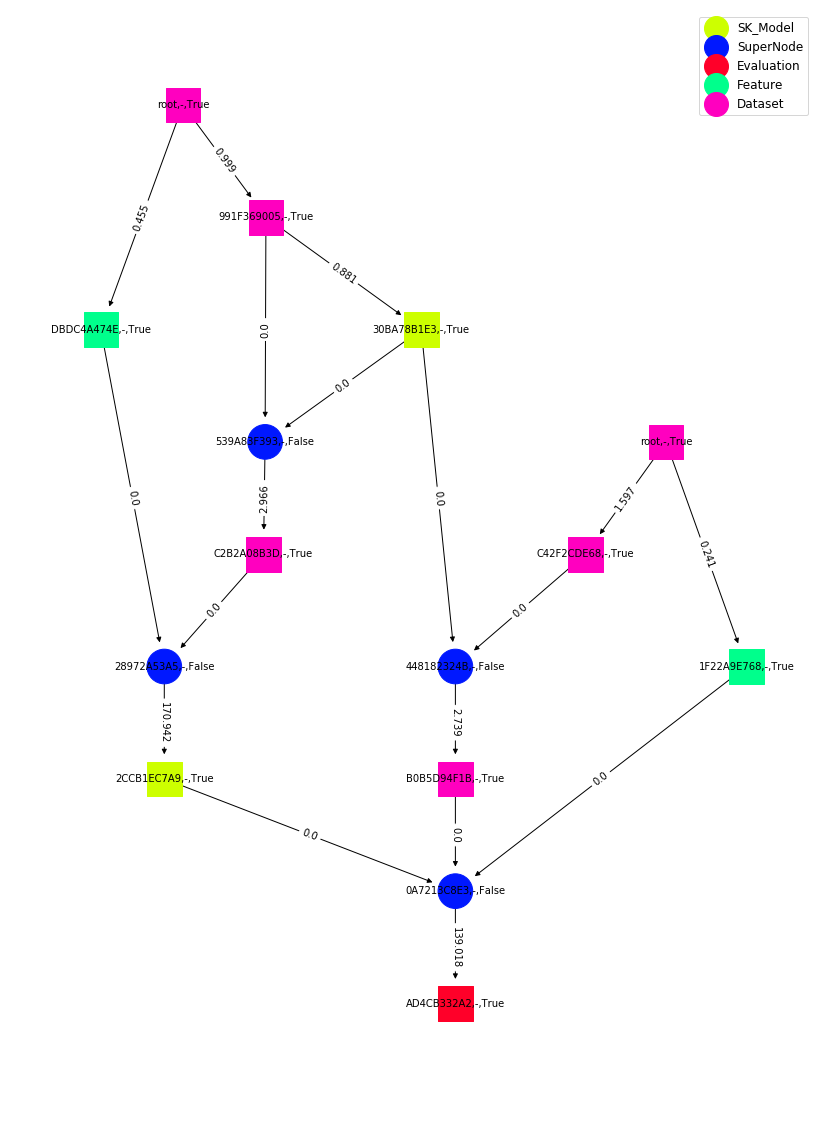

In [6]:
executor.execution_environment.experiment_graph.plot_graph(
    plt,
    figsize=(14, 20),
    labels_for_vertex=['id','mat'],
    labels_for_edges=['execution_time'],
    vertex_size=1200)

In [7]:
class ReuseFullWorkload(Workload):
    def run(self, execution_environment, root_data, verbose):
        # Load Data
        train = ee.load(root_data + '/openml/task_id=31/train.csv')
        test = ee.load(root_data + '/openml/task_id=31/test.csv')

        test_labels = test['class']
        test = test.drop('class')
        #test_labels.data()
        train_labels = train['class']
        train = train.drop(columns=['class'])
        
        #train_labels.data()
        from experiment_graph.sklearn_helper.preprocessing import MinMaxScaler
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(train)
        train = scaler.transform(train)
        test = scaler.transform(test)

        # Random Forest 1 (n_estimator = 10)
        from experiment_graph.sklearn_helper.ensemble import RandomForestClassifier
        random_forest10 = RandomForestClassifier(n_estimators=10, random_state=50, verbose=1, n_jobs=-1)
        random_forest10.fit(train, train_labels)

        # Execute
        #random_forest10.trained_node.data()
        
        print 'score: {}'.format(random_forest10.score(test, test_labels).data(verbose=verbose))
        return True

full_workload = ReuseFullWorkload()
executor.end_to_end_run(workload=full_workload, root_data=root_data, verbose = 1)

After forward pass mat_set=set(['AD4CB332A23AF19C1150A43876F369FD', '2CCB1EC7A9FF11E906F0C2558E6A6CFF', 'DBDC4A474E8B084B17D4A95D82CBA082', '30BA78B1E3083C85ED55C85637140914', '1F22A9E7687B4B9E5ED728910FC93F1A', 'C42F2CDE6885202579E291D6BC09DAA6', 'C2B2A08B3D0EFA08C2A06B7187FF500B', 'B0B5D94F1B43F18EF00C461EC8EEDFAF', '991F3690053BFE13CEDF335CFB510266']), warm_set=set([])
After backward pass mat_set=set(['AD4CB332A23AF19C1150A43876F369FD', '2CCB1EC7A9FF11E906F0C2558E6A6CFF', 'DBDC4A474E8B084B17D4A95D82CBA082', '30BA78B1E3083C85ED55C85637140914', '1F22A9E7687B4B9E5ED728910FC93F1A', 'C42F2CDE6885202579E291D6BC09DAA6', 'C2B2A08B3D0EFA08C2A06B7187FF500B', 'B0B5D94F1B43F18EF00C461EC8EEDFAF', '991F3690053BFE13CEDF335CFB510266']), warm_set=set([])
materialized_vertices: set(['AD4CB332A23AF19C1150A43876F369FD'])
warmstarting_candidates: set([])
AD4CB332A23AF19C1150A43876F369FD was copied directly from experiment graph
score: {'accuracy': 0.79000000000000004}


True

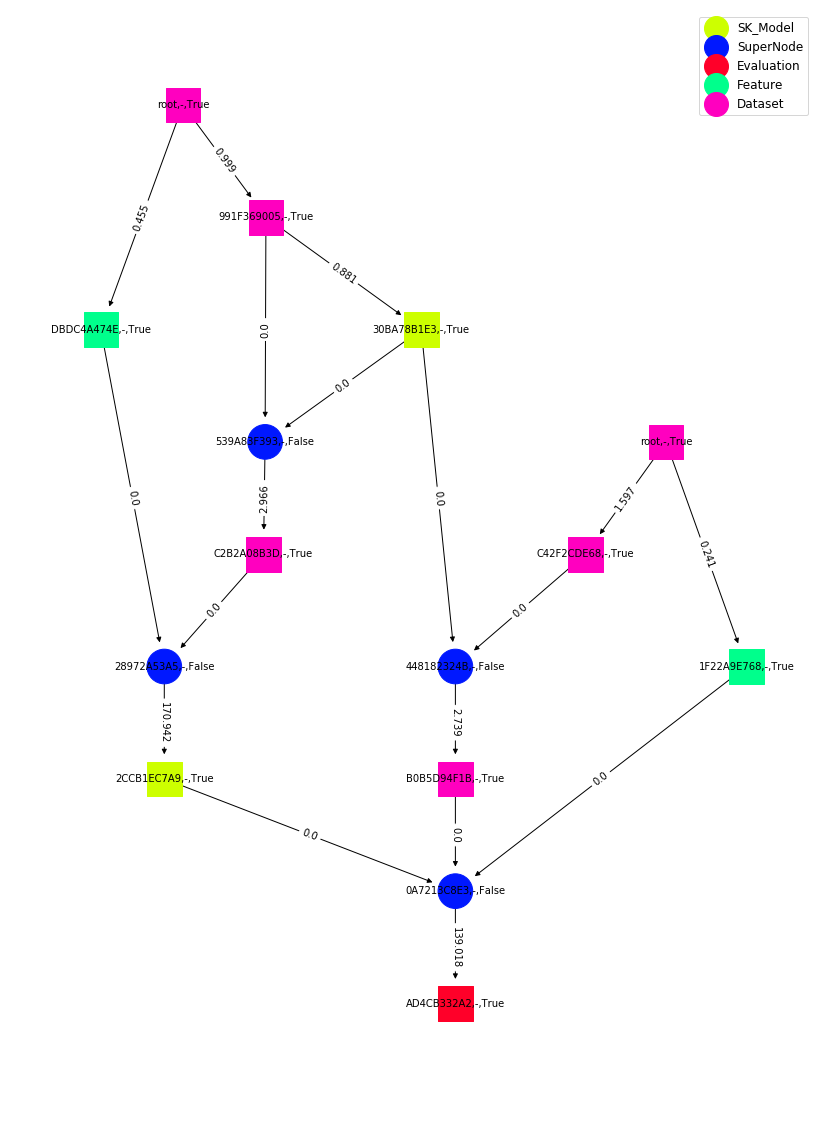

In [7]:
executor.execution_environment.experiment_graph.plot_graph(
    plt,
    figsize=(14, 20),
    labels_for_vertex=['id','mat'],
    labels_for_edges=['execution_time'],
    vertex_size=1200)

In [8]:
class HighQualityModel(Workload):
    def run(self, execution_environment, root_data, verbose):
        # Load Data
        train = ee.load(root_data + '/openml/task_id=31/train.csv')
        test = ee.load(root_data + '/openml/task_id=31/test.csv')

        test_labels = test['class']
        test = test.drop('class')
        #test_labels.data()
        train_labels = train['class']
        train = train.drop(columns=['class'])
        
        #train_labels.data()
        from experiment_graph.sklearn_helper.preprocessing import MinMaxScaler
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(train)
        train = scaler.transform(train)
        test = scaler.transform(test)

        # Random Forest 1 (n_estimator = 10)
        from experiment_graph.sklearn_helper.ensemble import RandomForestClassifier
        random_forest10 = RandomForestClassifier(n_estimators=512, random_state=50, max_features=0.45, min_impurity_split=1e-07,
                                                 verbose=1, min_samples_leaf=6, min_samples_split=7,min_weight_fraction_leaf=0.0,
                                                 n_jobs=-1)
        random_forest10.fit(train, train_labels)

        # Execute
        #random_forest10.trained_node.data()
        
        print 'score: {}'.format(random_forest10.score(test, test_labels).data(verbose=verbose))
        return True

workload = HighQualityModel()
executor.end_to_end_run(workload=workload, root_data=root_data, verbose = 1)

After forward pass mat_set=set(['DBDC4A474E8B084B17D4A95D82CBA082', '30BA78B1E3083C85ED55C85637140914', '1F22A9E7687B4B9E5ED728910FC93F1A', 'C42F2CDE6885202579E291D6BC09DAA6', 'C2B2A08B3D0EFA08C2A06B7187FF500B', 'B0B5D94F1B43F18EF00C461EC8EEDFAF', '991F3690053BFE13CEDF335CFB510266']), warm_set=set(['ACB62E5249F430339A3466166DFD286F'])
After backward pass mat_set=set(['DBDC4A474E8B084B17D4A95D82CBA082', '30BA78B1E3083C85ED55C85637140914', '1F22A9E7687B4B9E5ED728910FC93F1A', 'C42F2CDE6885202579E291D6BC09DAA6', 'C2B2A08B3D0EFA08C2A06B7187FF500B', 'B0B5D94F1B43F18EF00C461EC8EEDFAF', '991F3690053BFE13CEDF335CFB510266']), warm_set=set(['ACB62E5249F430339A3466166DFD286F'])
materialized_vertices: set(['C2B2A08B3D0EFA08C2A06B7187FF500B', 'DBDC4A474E8B084B17D4A95D82CBA082', '1F22A9E7687B4B9E5ED728910FC93F1A', 'B0B5D94F1B43F18EF00C461EC8EEDFAF'])
warmstarting_candidates: set([])


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/

/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_spli

/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_spli

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 512 out of 512 | elapsed:    0.2s finished


executing 7 steps to compute vertex 6614F7900BF064162A519D065BBA0AC1
score: {'accuracy': 0.81999999999999995}


True

In [9]:
start = datetime.now()
class WarmstartTest(Workload):
    def run(self, execution_environment, root_data, verbose):
        # Load Data
        train = ee.load(root_data + '/openml/task_id=31/train.csv')
        test = ee.load(root_data + '/openml/task_id=31/test.csv')

        test_labels = test['class']
        test = test.drop('class')
        #test_labels.data()
        train_labels = train['class']
        train = train.drop(columns=['class'])
        
        #train_labels.data()
        from experiment_graph.sklearn_helper.preprocessing import MinMaxScaler
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(train)
        train = scaler.transform(train)
        test = scaler.transform(test)

        # Random Forest 1 (n_estimator = 10)
        from experiment_graph.sklearn_helper.ensemble import RandomForestClassifier
        random_forest10 = RandomForestClassifier(n_estimators=1024, random_state=50, max_features=0.45, min_impurity_split=1e-07,
                                                 verbose=1, min_samples_leaf=6, min_samples_split=7,min_weight_fraction_leaf=0.0,
                                                 n_jobs=-1, should_warmstart=True)
        random_forest10.fit(train, train_labels)

        # Execute
        #random_forest10.trained_node.data()
        
        print 'score: {}'.format(random_forest10.score(test, test_labels).data(verbose=verbose))
        return True

workload = WarmstartTest()
executor.end_to_end_run(workload=workload, root_data=root_data, verbose = 1)
print 'with warmstarting: {}'.format((datetime.now() - start).total_seconds())

After forward pass mat_set=set(['DBDC4A474E8B084B17D4A95D82CBA082', '30BA78B1E3083C85ED55C85637140914', '1F22A9E7687B4B9E5ED728910FC93F1A', 'C42F2CDE6885202579E291D6BC09DAA6', 'C2B2A08B3D0EFA08C2A06B7187FF500B', 'B0B5D94F1B43F18EF00C461EC8EEDFAF', '991F3690053BFE13CEDF335CFB510266']), warm_set=set(['BD6D34BCFF2B77EA8F7C009563C13973'])
After backward pass mat_set=set(['DBDC4A474E8B084B17D4A95D82CBA082', '30BA78B1E3083C85ED55C85637140914', '1F22A9E7687B4B9E5ED728910FC93F1A', 'C42F2CDE6885202579E291D6BC09DAA6', 'C2B2A08B3D0EFA08C2A06B7187FF500B', 'B0B5D94F1B43F18EF00C461EC8EEDFAF', '991F3690053BFE13CEDF335CFB510266']), warm_set=set(['BD6D34BCFF2B77EA8F7C009563C13973'])
materialized_vertices: set(['C2B2A08B3D0EFA08C2A06B7187FF500B', 'DBDC4A474E8B084B17D4A95D82CBA082', '1F22A9E7687B4B9E5ED728910FC93F1A', 'B0B5D94F1B43F18EF00C461EC8EEDFAF'])
warmstarting_candidates: set([('28972A53A5F921894C4B56DA69ECE52F', 'BD6D34BCFF2B77EA8F7C009563C13973', RandomForestClassifier(bootstrap=True, class_weig

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 512 out of 512 | elapsed:    0.2s finished


executing 7 steps to compute vertex 480C470433292897D13955D8E7A16757
score: {'accuracy': 0.81999999999999995}
with warmstarting: 0.490403


In [10]:
start = datetime.now()
class NoWarmstartTest(Workload):
    def run(self, execution_environment, root_data, verbose):
        # Load Data
        train = ee.load(root_data + '/openml/task_id=31/train.csv')
        test = ee.load(root_data + '/openml/task_id=31/test.csv')

        test_labels = test['class']
        test = test.drop('class')
        #test_labels.data()
        train_labels = train['class']
        train = train.drop(columns=['class'])
        
        #train_labels.data()
        from experiment_graph.sklearn_helper.preprocessing import MinMaxScaler
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(train)
        train = scaler.transform(train)
        test = scaler.transform(test)

        # Random Forest 1 (n_estimator = 10)
        from experiment_graph.sklearn_helper.ensemble import RandomForestClassifier
        random_forest10 = RandomForestClassifier(n_estimators=1024, random_state=50, max_features=0.46, min_impurity_split=1e-07,
                                                 verbose=1, min_samples_leaf=6, min_samples_split=7,min_weight_fraction_leaf=0.0,
                                                 n_jobs=-1, should_warmstart=False)
        random_forest10.fit(train, train_labels)

        # Execute
        #random_forest10.trained_node.data()
        
        print 'score: {}'.format(random_forest10.score(test, test_labels).data(verbose=verbose))
        return True

workload = NoWarmstartTest()
executor.end_to_end_run(workload=workload, root_data=root_data, verbose = 1)
print 'without warmstarting: {}'.format((datetime.now() - start).total_seconds())

After forward pass mat_set=set(['DBDC4A474E8B084B17D4A95D82CBA082', '30BA78B1E3083C85ED55C85637140914', '1F22A9E7687B4B9E5ED728910FC93F1A', 'C42F2CDE6885202579E291D6BC09DAA6', 'C2B2A08B3D0EFA08C2A06B7187FF500B', 'B0B5D94F1B43F18EF00C461EC8EEDFAF', '991F3690053BFE13CEDF335CFB510266']), warm_set=set(['C85061E1A28DE6095D89845D602DF754'])
After backward pass mat_set=set(['DBDC4A474E8B084B17D4A95D82CBA082', '30BA78B1E3083C85ED55C85637140914', '1F22A9E7687B4B9E5ED728910FC93F1A', 'C42F2CDE6885202579E291D6BC09DAA6', 'C2B2A08B3D0EFA08C2A06B7187FF500B', 'B0B5D94F1B43F18EF00C461EC8EEDFAF', '991F3690053BFE13CEDF335CFB510266']), warm_set=set(['C85061E1A28DE6095D89845D602DF754'])
materialized_vertices: set(['1F22A9E7687B4B9E5ED728910FC93F1A', 'DBDC4A474E8B084B17D4A95D82CBA082', 'C2B2A08B3D0EFA08C2A06B7187FF500B', 'B0B5D94F1B43F18EF00C461EC8EEDFAF'])
warmstarting_candidates: set([])


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/

/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_spli

/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_spli

/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_spli

/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_spli

/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_spli

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1024 out of 1024 | elapsed:    0.3s finished


executing 7 steps to compute vertex BF162035B8F0D8650CEA6449B43FC33E
score: {'accuracy': 0.80000000000000004}
without warmstarting: 3.533758
